In [77]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas_datareader import data as web
import pprint
import statsmodels.tsa.stattools as ts

from pandas.stats.api import ols

%matplotlib inline


In [78]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 7, 8)

sym1 = 'OMAB.MX'
sym2 = 'GAPB.MX'

df1 = web.DataReader(sym1, "yahoo", start, end)
df2 = web.DataReader(sym2, "yahoo", start, end)

df = pd.DataFrame(index=df1.index)
df[sym1] = df1["Adj Close"]
df[sym2] = df2["Adj Close"]


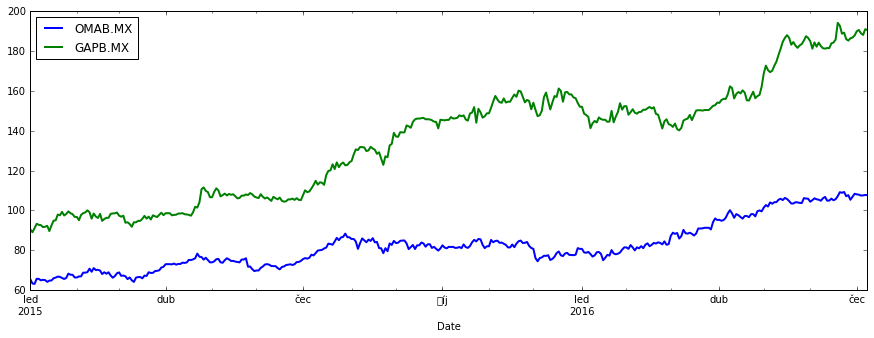

In [79]:
df[[sym1,sym2]].plot(linewidth=2, figsize=(15,5))


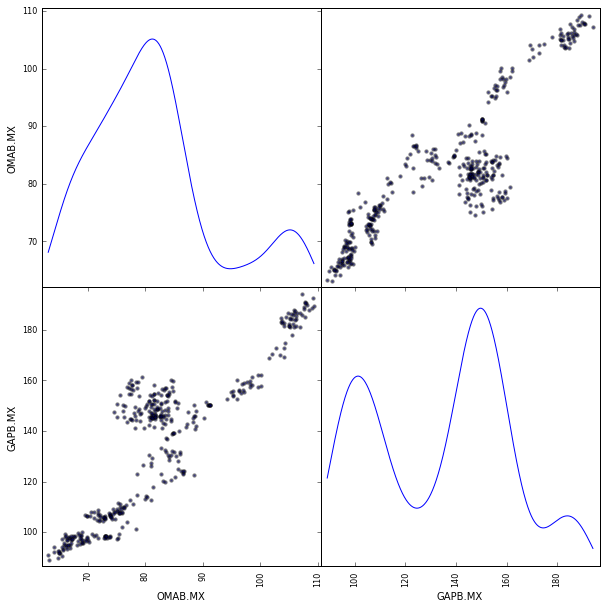

In [80]:
pd.scatter_matrix(df, diagonal='kde', figsize=(10, 10), linewidth=2);

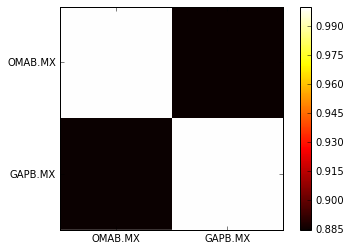

In [81]:
corr = df.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

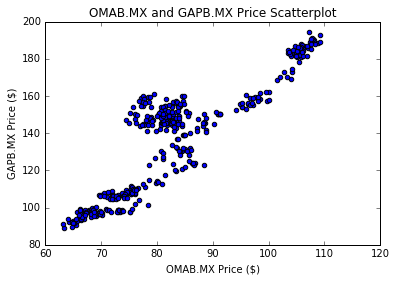

In [82]:
def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()
    

# Display a scatter plot of the two time series
plot_scatter_series(df, sym1, sym2)


In [83]:
def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()

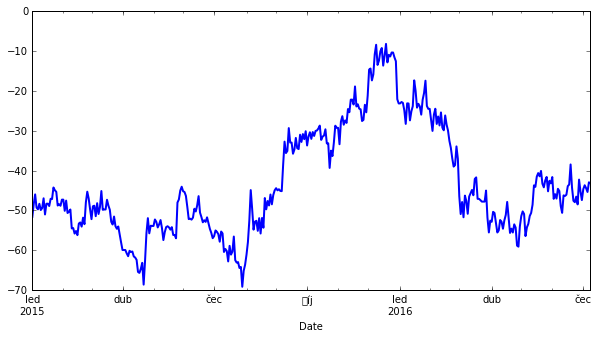

In [84]:

# Calculate optimal hedge ratio "beta"
res = ols(y=df[sym2], x=df[sym1])
beta_hr = res.beta.x

# Calculate the residuals of the linear combination
df["res"] = df[sym2] - beta_hr*df[sym1]

# Plot the residuals
df['res'].plot(figsize=(10,5), linewidth=2)
  

In [85]:
# Calculate and output the CADF test on the residuals
cadf = ts.adfuller(df["res"])
pprint.pprint(cadf) 

(-1.5929511875567328,
 0.48713339707629849,
 2,
 394,
 {'1%': -3.4470566389664703,
  '10%': -2.5706926635574221,
  '5%': -2.8689037160476016},
 1851.6903465490113)


In [86]:
print "Is there cointegration in the observed time period? ", cadf[0]<min(cadf[4].values())


Is there cointegration in the observed time period?  False
